Este código carga datos de cáncer de mama, crea modelos de clasificación con Random Forest, Bagging y Extra Trees, y calcula la precisión. También muestra gráficos de importancia de características y otros visualizaciones de datos.
------------------------------------------------------------------------------------------------------------------------------

In [15]:
#bibliotecas
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from tabulate import tabulate
import numpy as np
import seaborn as sns


Este código carga el conjunto de datos de cáncer de mama utilizando la función `load_breast_cancer()` de scikit-learn. Luego, se asignan las características (X) y las etiquetas (y) del conjunto de datos. Además, se almacenan los nombres de las características en la variable `feature_names`.
------------------------------------------------------------------------------------------------------------------------------

In [16]:
#conjunto de datos
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names


En este código, se entrena un modelo de Random Forests y se visualiza la importancia de las características mediante un gráfico de barras horizontales.
------------------------------------------------------------------------------------------------------------------------------

/tmp/ipykernel_13048/2146098593.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


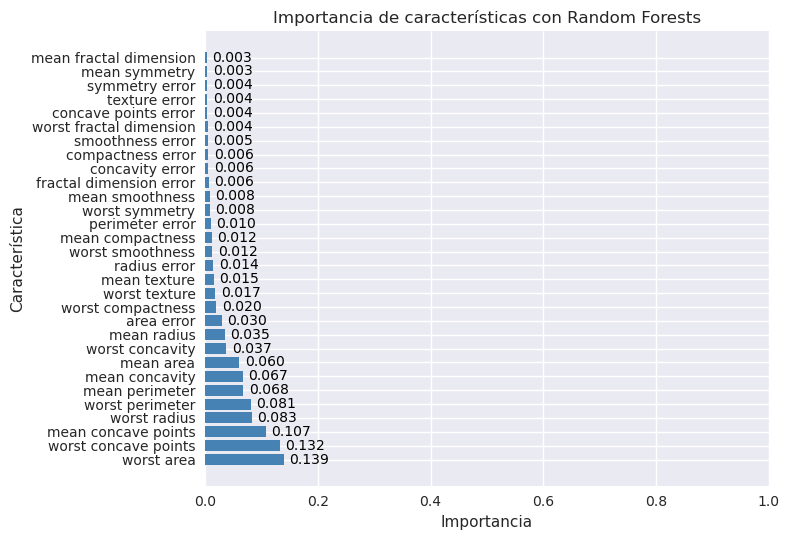

In [17]:
# Entreno el Random Forests + grafica
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values('Importance', ascending=False).reset_index(drop=True)

plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.barh(importance_df['Feature'], importance_df['Importance'], color='steelblue')
ax.set_xlim(0, 1)
ax.set_xlabel('Importancia')
ax.set_ylabel('Característica')

for i, v in enumerate(importance_df['Importance']):
    ax.text(v + 0.01, i, f'{v:.3f}', color='black', va='center')

plt.title('Importancia de características con Random Forests')
plt.tight_layout()
plt.show()


In [ ]:
#DATOOOOOS IMPORTANCIA + RESUMEN DE DATOS Y PRECISION + ESTADISTICAS

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bagging = BaggingClassifier(random_state=42)
bagging.fit(X_train, y_train)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

et = ExtraTreesClassifier(random_state=42)
et.fit(X_train, y_train)

y_pred_bagging = bagging.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_et = et.predict(X_test)

accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_et = accuracy_score(y_test, y_pred_et)

baseline_prediction = np.bincount(y_train).argmax()
baseline_accuracy = accuracy_score(y_test, np.full_like(y_test, baseline_prediction))

results = [
    ["Clasificador", "Precisión", "Precisión con Línea Base"],
    ["Bagging", accuracy_bagging, baseline_accuracy],
    ["Random Forests", accuracy_rf, baseline_accuracy],
    ["Extra Trees", accuracy_et, baseline_accuracy]
]

feature_importance_table = [
    ["Índice", "Nombre de Característica", "Importancia"]
]

sorted_indices = np.argsort(rf.feature_importances_)[::-1]
for i, feature_index in enumerate(sorted_indices):
    feature_name = data.feature_names[feature_index]
    feature_importance = rf.feature_importances_[feature_index]
    feature_importance_table.append([i+1, feature_name, feature_importance])

print("\nImportancia de características (Random Forests):")
print(tabulate(feature_importance_table, headers="firstrow", tablefmt="grid"))